In [ ]:
!pip install pandas==1.3.3
!pip install numpy==1.21.2
!pip install scipy
!pip install seaborn
!pip install matplotlib
!pip install statsmodels
!pip install js

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 20.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 1.3.3 which is incompatible.
mizani 0.8.1 requires pandas>=1.3.5, but you have pandas 1.3.3 which is incompatible.
plotnine 0.10.1 requires pandas>=1.3.5, but you have pandas 1.3.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 70.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 5.8 MB/s eta 0:00:00
  Created wheel for js: filename=js-1.0-py3-none-any.whl size=2883 sha256=3da1450e6022eb0d9acff12b2a4dc3d0441501fb2d6019c748cf920a24817387
  Stored in directory: /root/.cache/pip/wheels/77/dc/68/d580eaea0ef6137289a09dabe661f5df14951f5c29c08d443d
Successfully built js


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
import requests
import io

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
response = requests.get(boston_url)
boston_data = pd.read_csv(io.StringIO(response.text))

In [ ]:
boston_data.info()
print(boston_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB
Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


"Median value of owner-occupied homes"

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5281dc8340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5281dc83a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5281dc90f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5281dcb4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5281dc8640>],
 'means': []}

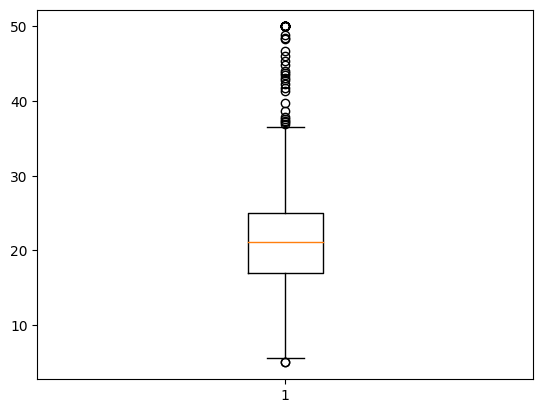

In [ ]:
pyplot.boxplot(x='MEDV',data=boston_data)

Charles River Variable

<Axes: ylabel='CHAS'>

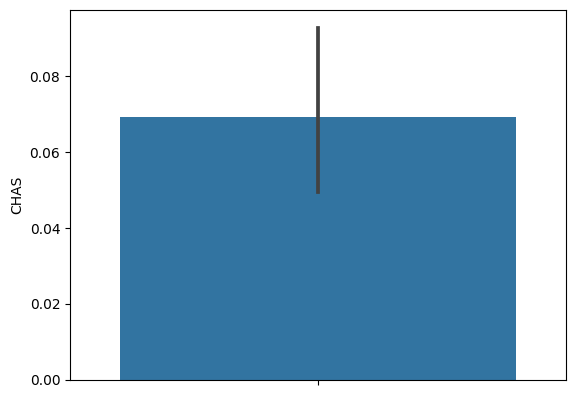

In [ ]:
sns.barplot(y='CHAS',data=boston_data)

Boxplot for MEDV vs AGE

<Axes: xlabel='age_group', ylabel='MEDV'>

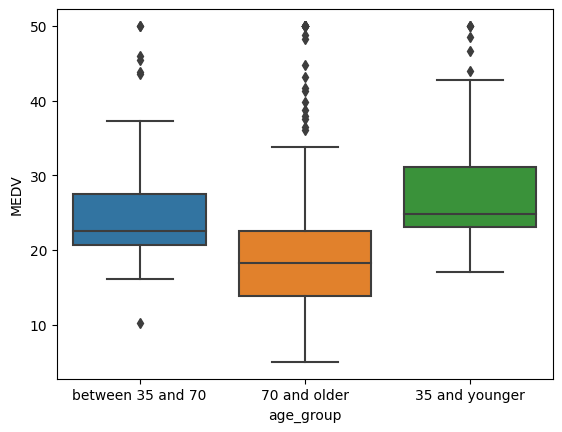

In [ ]:
boston_data.loc[(boston_data['AGE']<=35), 'age_group'] = '35 and younger'
boston_data.loc[(boston_data['AGE']>35)&(boston_data['AGE']<70), 'age_group'] = 'between 35 and 70'
boston_data.loc[(boston_data['AGE']>=70), 'age_group'] = '70 and older'


sns.boxplot(x='age_group', y='MEDV', data=boston_data)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<Axes: xlabel='NOX', ylabel='INDUS'>

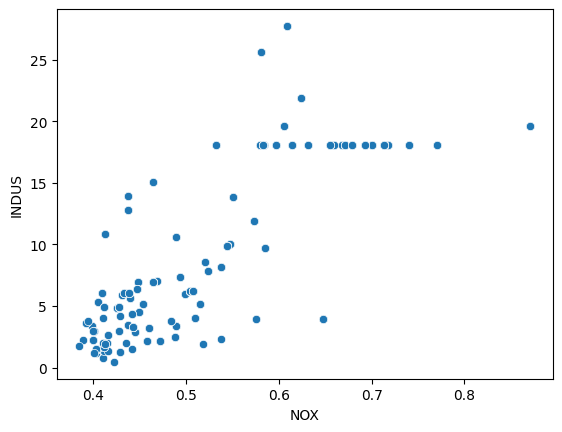

In [ ]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_data)

The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town appears to have some correlation in a linear fashion.


Text(0, 0.5, 'Pupils')

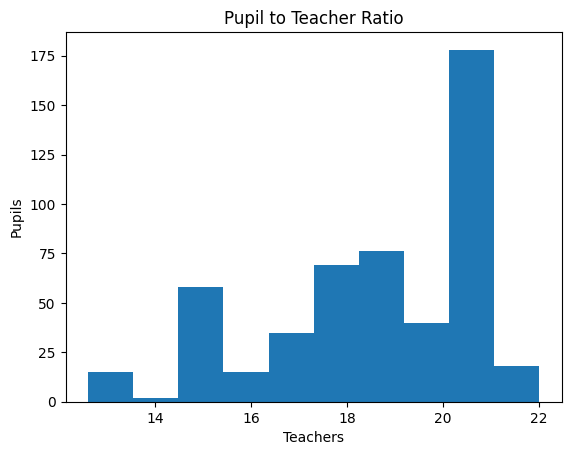

In [ ]:
pyplot.hist(x='PTRATIO', data=boston_data)
pyplot.title('Pupil to Teacher Ratio')
pyplot.xlabel('Teachers')
pyplot.ylabel('Pupils')

#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#Hypothesis:
H_0: u1 = u2
H_1: u1 != u2

In [ ]:

stats.levene(boston_data[boston_data['CHAS'] ==  True]['MEDV'], boston_data[boston_data['CHAS'] == False]['MEDV'])



LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [ ]:
stats.ttest_ind(boston_data[boston_data['CHAS'] == True]['MEDV'], boston_data[boston_data['CHAS'] == False]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

#Conclusion: Since the p-value is less than the alpha value we reject the null hypothesis as there is sufficient evidence there is a statistcal difference between Median value of homes that are or are not bound by the Charles river

#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#Hypothesis: H_0 : u_1 = u_2 = u_3 Population means are equal
#H_1: at least one population mean differs


In [ ]:
stats.levene(boston_data[boston_data['age_group'] == '35 and younger']['MEDV'],
            boston_data[boston_data['age_group'] == 'between 35 and 70']['MEDV'],
            boston_data[boston_data['age_group'] == '70 and older']['MEDV'], center='mean')


thirtyfive_lower_medv = boston_data[boston_data['age_group'] == '35 and younger']['MEDV']
thirtyfive_fiftyseven_medv = boston_data[boston_data['age_group'] == 'between 35 and 70']['MEDV']
seventy_older_medv = boston_data[boston_data['age_group'] == '70 and older']['MEDV']

f_statistic, p_value = stats.f_oneway(thirtyfive_lower_medv, thirtyfive_fiftyseven_medv, seventy_older_medv)
print ("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#Conclusion: Since the p-value is less than .05 we reject the null hypothesis as there is significant evidence one of the means differs.

#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H_0 - Not correlated
H_1 - Correlated

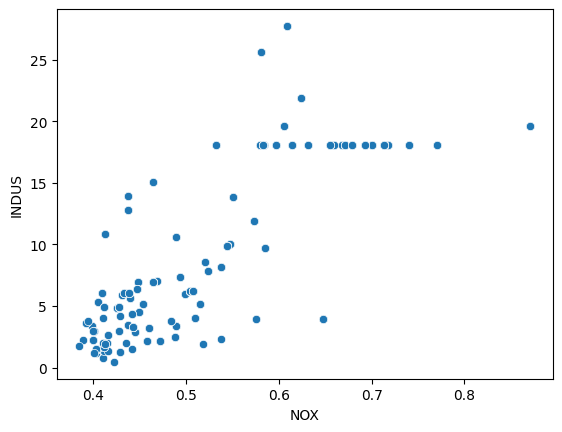

In [ ]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_data)

In [ ]:
stats.pearsonr(boston_data['NOX'], boston_data['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

# Conclusion: Since the p-value < 0.05 and the Pearson result is close to 1, we reject the null hypothesis as the results suggest there is a strong positive, linear relationship between the variables that is statistically significant.

#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#Hypothesis H_0 : B1 = 0 (Distance to employment centers does not affect value of homes)
 # H_1 : B1 != 0 (Distance to employment centers does affect value of homes)

In [ ]:
X = boston_data['DIS']
y = boston_data['MEDV']

x = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Wed, 10 May 2023   Prob (F-statistic):                   1.52e-146
Time:                        15:10:03   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#Conclusion: The p-value is less than the alpha level 0.05 so we reject the null hypothesis as there is evidence that distance to the employment centers affects the value of owner occupied homes.